Cross-shelf transport (diff, adv, total) comparison between cases
==

This notebook explores the similarities and differences between the 3 tracer transports along case3DDIFF, CNTDIFF (when it is ready), and NOGMREDI as well as canyon and no canyon cases. It looks at the transport normal to a shelf break wall<sup>1</sup>. Total Tracer Transport (TracTrans) is understood here as tracer transport (concentration * transport) per cell area; similarly, Total Transport (Trans) is transport per cell area, which is only the speed. This gives the following units:

$[TracTrans] = [C]ms^{-1} $

$[Trans] = [v] = ms^{-1} $

TracTrans = AdvFlux + DiffFlux / cell area

<sup>1</sup> Plane that goes from shelf-break depth to surface and all along the shelf break

In [2]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [3]:
lib_path = os.path.abspath('../PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb

import savitzky_golay as sg

In [4]:
CanyonGrid='/Volumes/MOBY/NOGMREDI/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj

CanyonState='/Volumes/MOBY/NOGMREDI/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

FluxTR01 = '/Volumes/MOBY/NOGMREDI/run03/FluxTR01Glob.nc'
FluxOut1 = Dataset(FluxTR01)

FluxTR03 = '/Volumes/MOBY/NOGMREDI/run03/FluxTR03Glob.nc'
FluxOut3 = Dataset(FluxTR03)

CanyonGridNoC='/Volumes/MOBY/NOGMREDI/run04/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonStateNoC='/Volumes/MOBY/NOGMREDI/run04/stateGlob.nc'

FluxTR01NoC = '/Volumes/MOBY/NOGMREDI/run04/FluxTR01Glob.nc'
FluxTR03NoC = '/Volumes/MOBY/NOGMREDI/run04/FluxTR03Glob.nc'

In [5]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(CanyonGridNoC, 'HFacC')
MaskCNoC = rout.getMask(CanyonGridNoC, 'HFacC')

dxF = rout.getField(CanyonGrid, 'dxF')
drF = CanyonGridOut.variables['drF']

In [7]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

### Adv, Diff, Total

In [8]:
#ADVy01NoC = rout.getField(FluxTR01NoC,'ADVyTr01') # 
#ADVy01 = rout.getField(FluxTR01,'ADVyTr01') # 

#ADVy01NoC = rout.getField(FluxTR01NoC,'ADVxTr01') # 
#ADVy01 = rout.getField(FluxTR01,'ADVxTr01') # 

In [9]:
#DFyE01NoC = rout.getField(FluxTR01NoC,'DFyETr01') # 
#DFyE01 = rout.getField(FluxTR01,'DFyETr01') # 

#DFxE01NoC = rout.getField(FluxTR01NoC,'DFxETr01') # 
#DFxE01 = rout.getField(FluxTR01,'DFxETr01') # 

In [ ]:
#VTRAC01NoC = rout.getField(FluxTR01NoC,'VTRAC01') #  
# This very similar to advective transport / cell area, so use instead of adv trans
VTRAC01 = rout.getField(FluxTR01,'VTRAC01') # 

#UTRAC01NoC = rout.getField(FluxTR01NoC,'UTRAC01') # 
UTRAC01 = rout.getField(FluxTR01,'UTRAC01') # 

V = rout.getField(CanyonState,'V') # 
#VNoC = rout.getField(CanyonStateNoC,'V') # 
U = rout.getField(CanyonState,'U') # 
#UNoC = rout.getField(CanyonStateNoC,'U') # 


In [7]:
zlev = 29
SBx, SBy = sb.findShelfBreak(zlev,hFacC)
SBxx = SBx[:-1]
SByy = SBy[:-1]
slope, theta = sb.findSlope(xc,yc,SBxx,SByy)
slopeFilt = sg.savitzky_golay(slope, 11, 3) # window size 11, polynomial order 3
thetaFilt = np.arctan(slopeFilt)


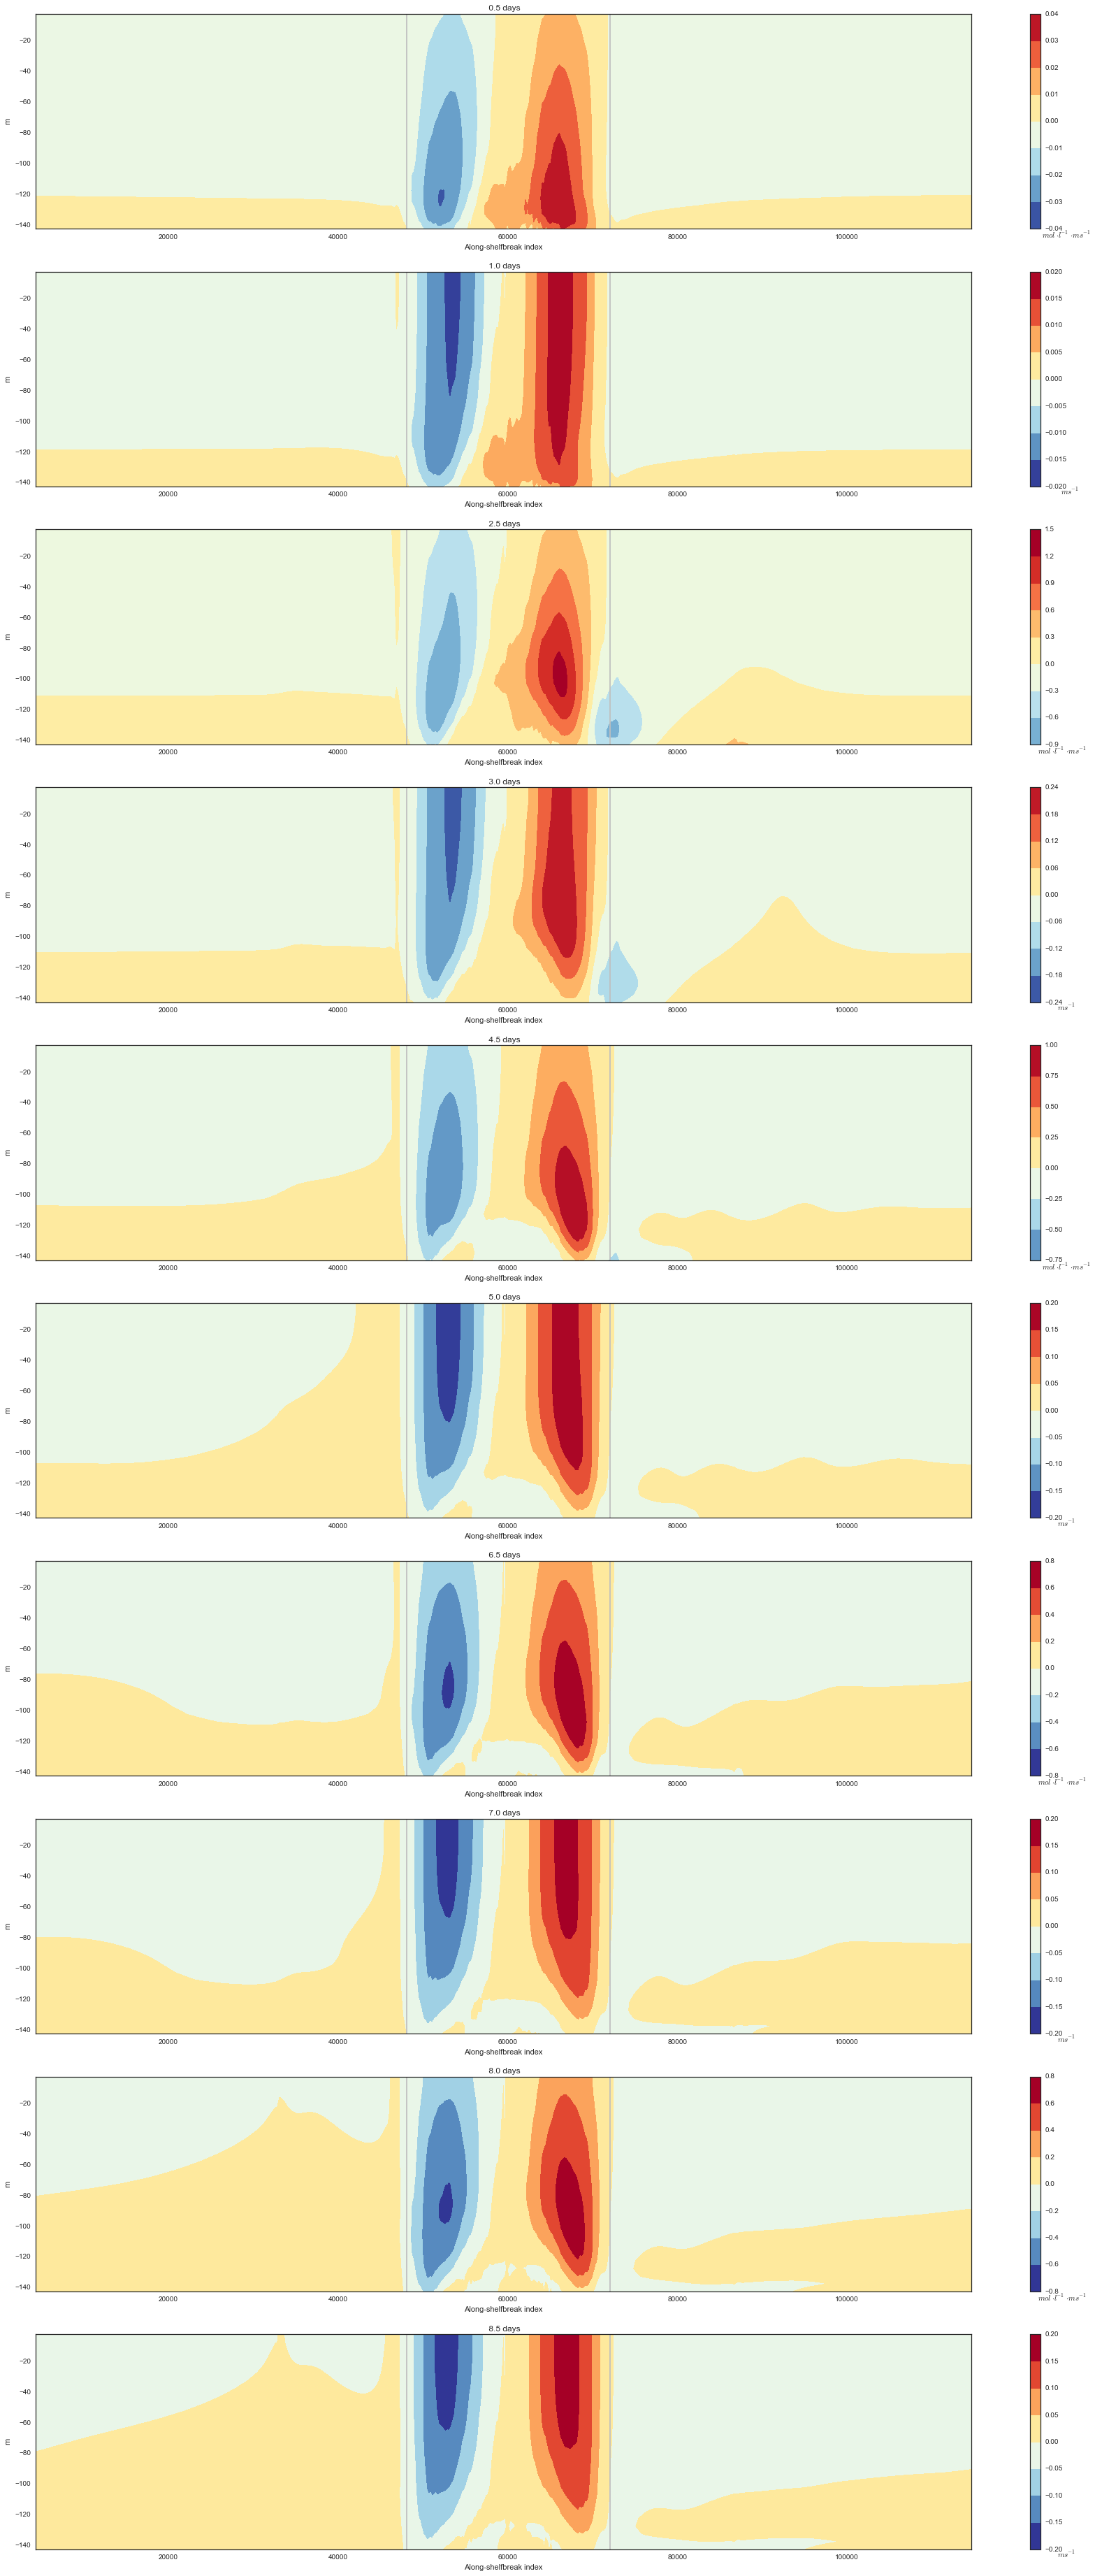

In [8]:
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(30,65)
numCols = 1
numRows = 10
zlev = 29
unitsTr = 'Index'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],ADVy01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],ADVx01,z,xc,zlev,hFacC,MaskC)
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    TracMax = np.max(TracTrans)
    VelMax = np.max(NormalVel)

    sb.contourfFluxSB(tt[0],numCols,numRows,(NormalVel*TracMax)/(VelMax*TracTrans),z,xc,unitsTr, 0,29,kk,zlev)
    
    
    kk = kk+2

    
   

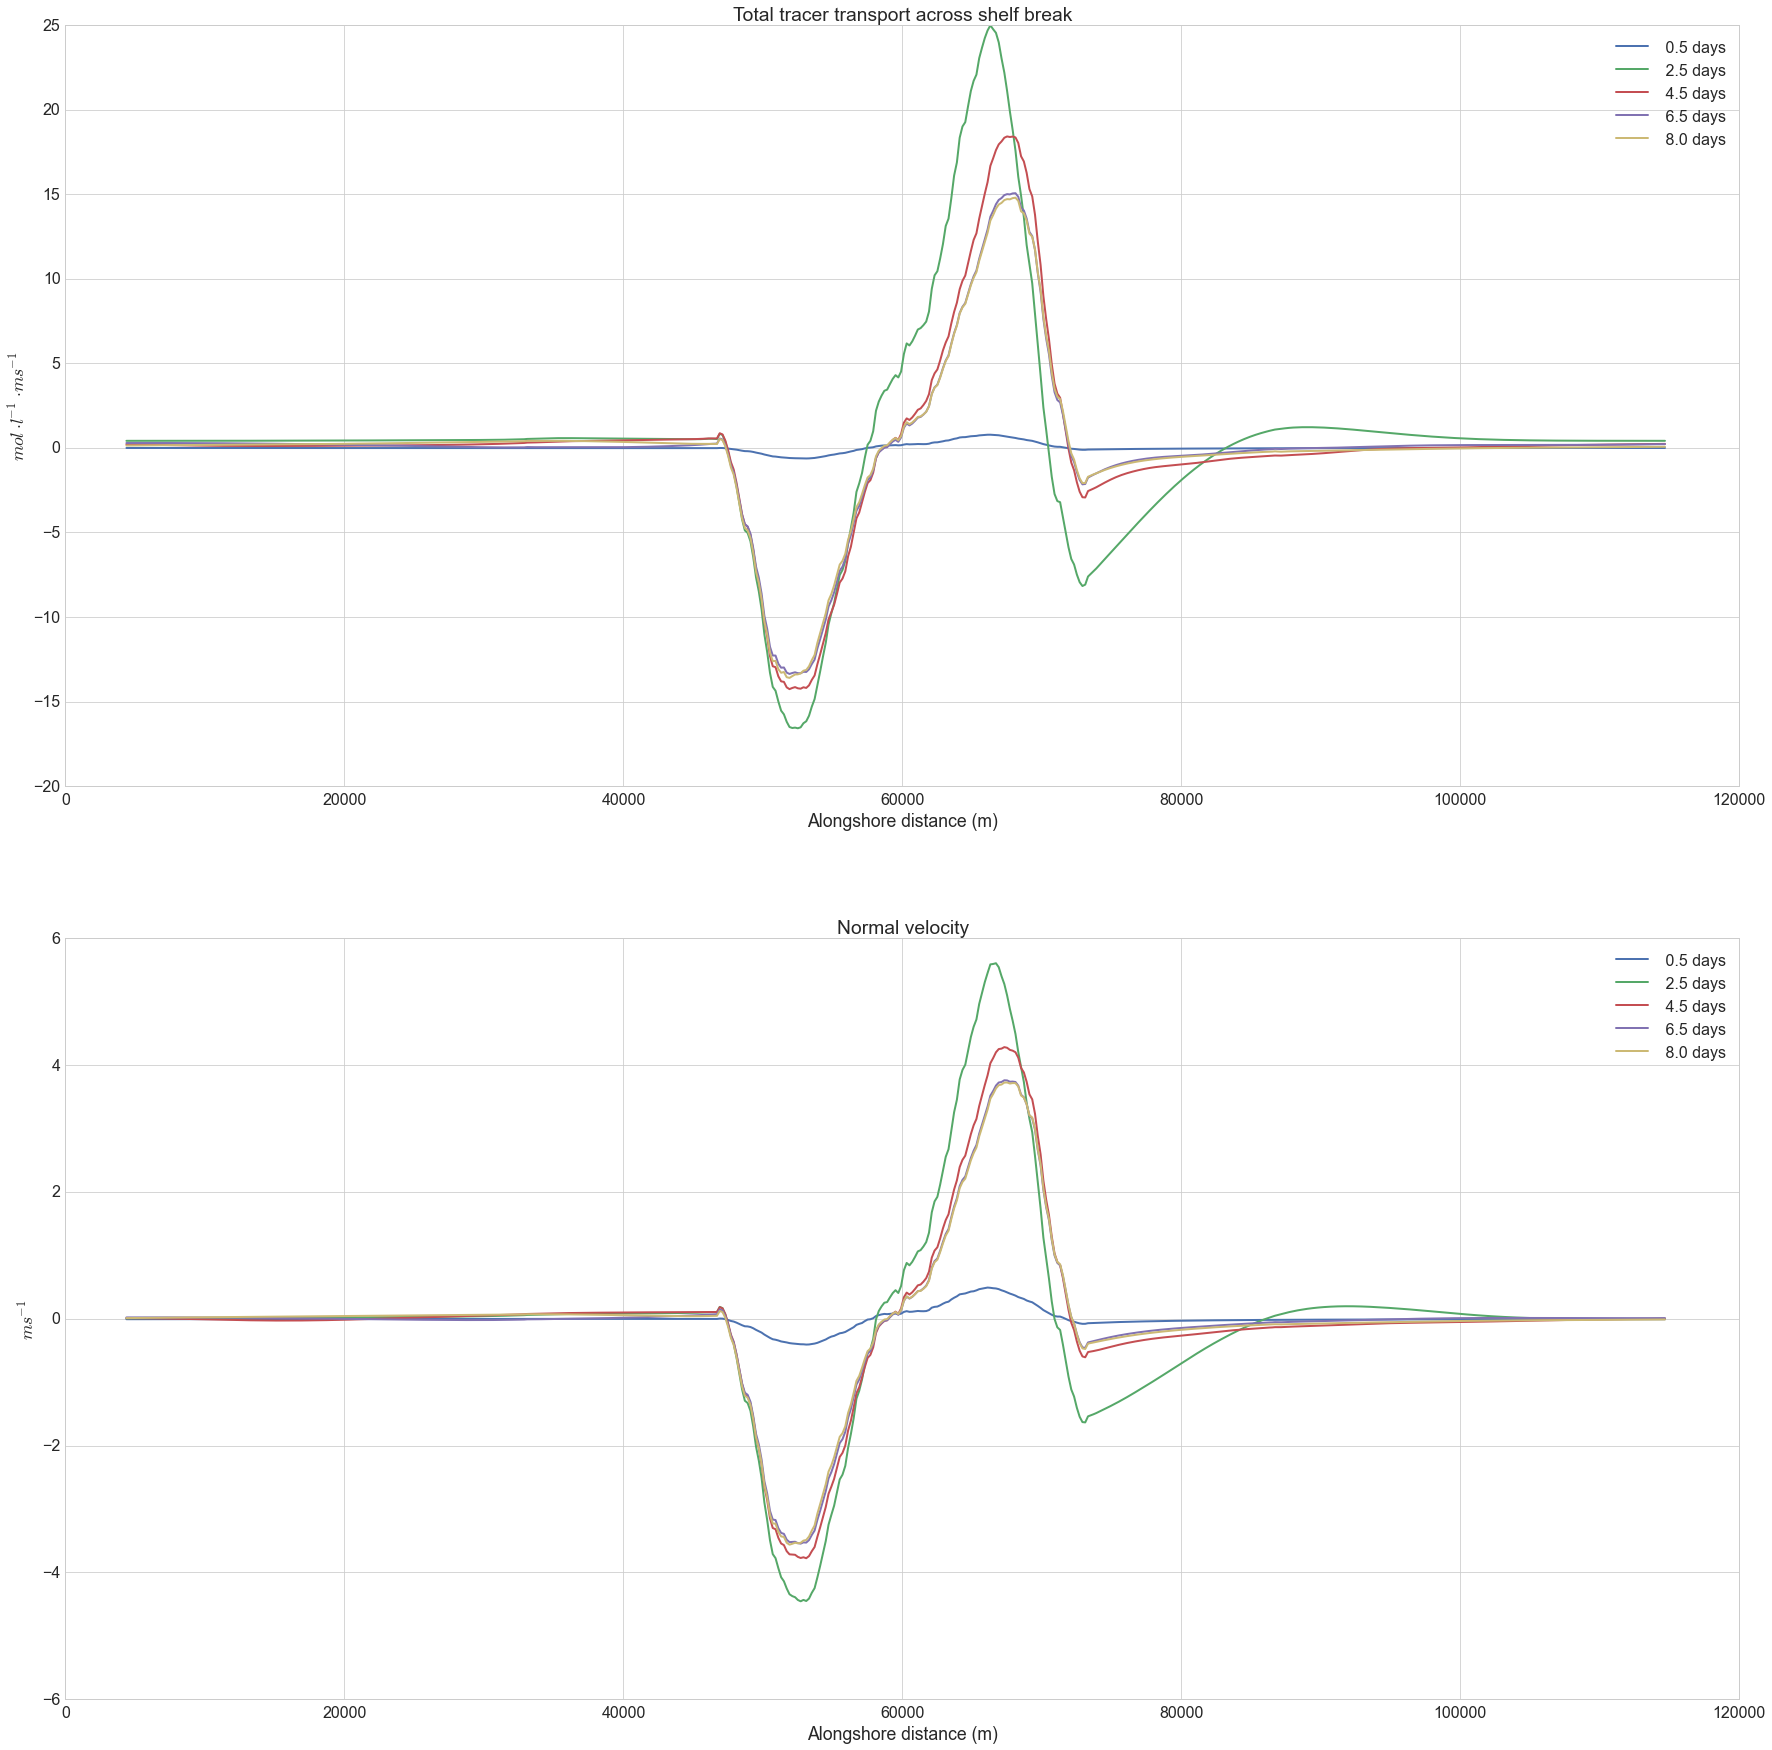

In [9]:
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(30,30)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],UTRAC01,z,xc,zlev,hFacC,MaskC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(TracTrans,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(NormalVel,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')
    
    

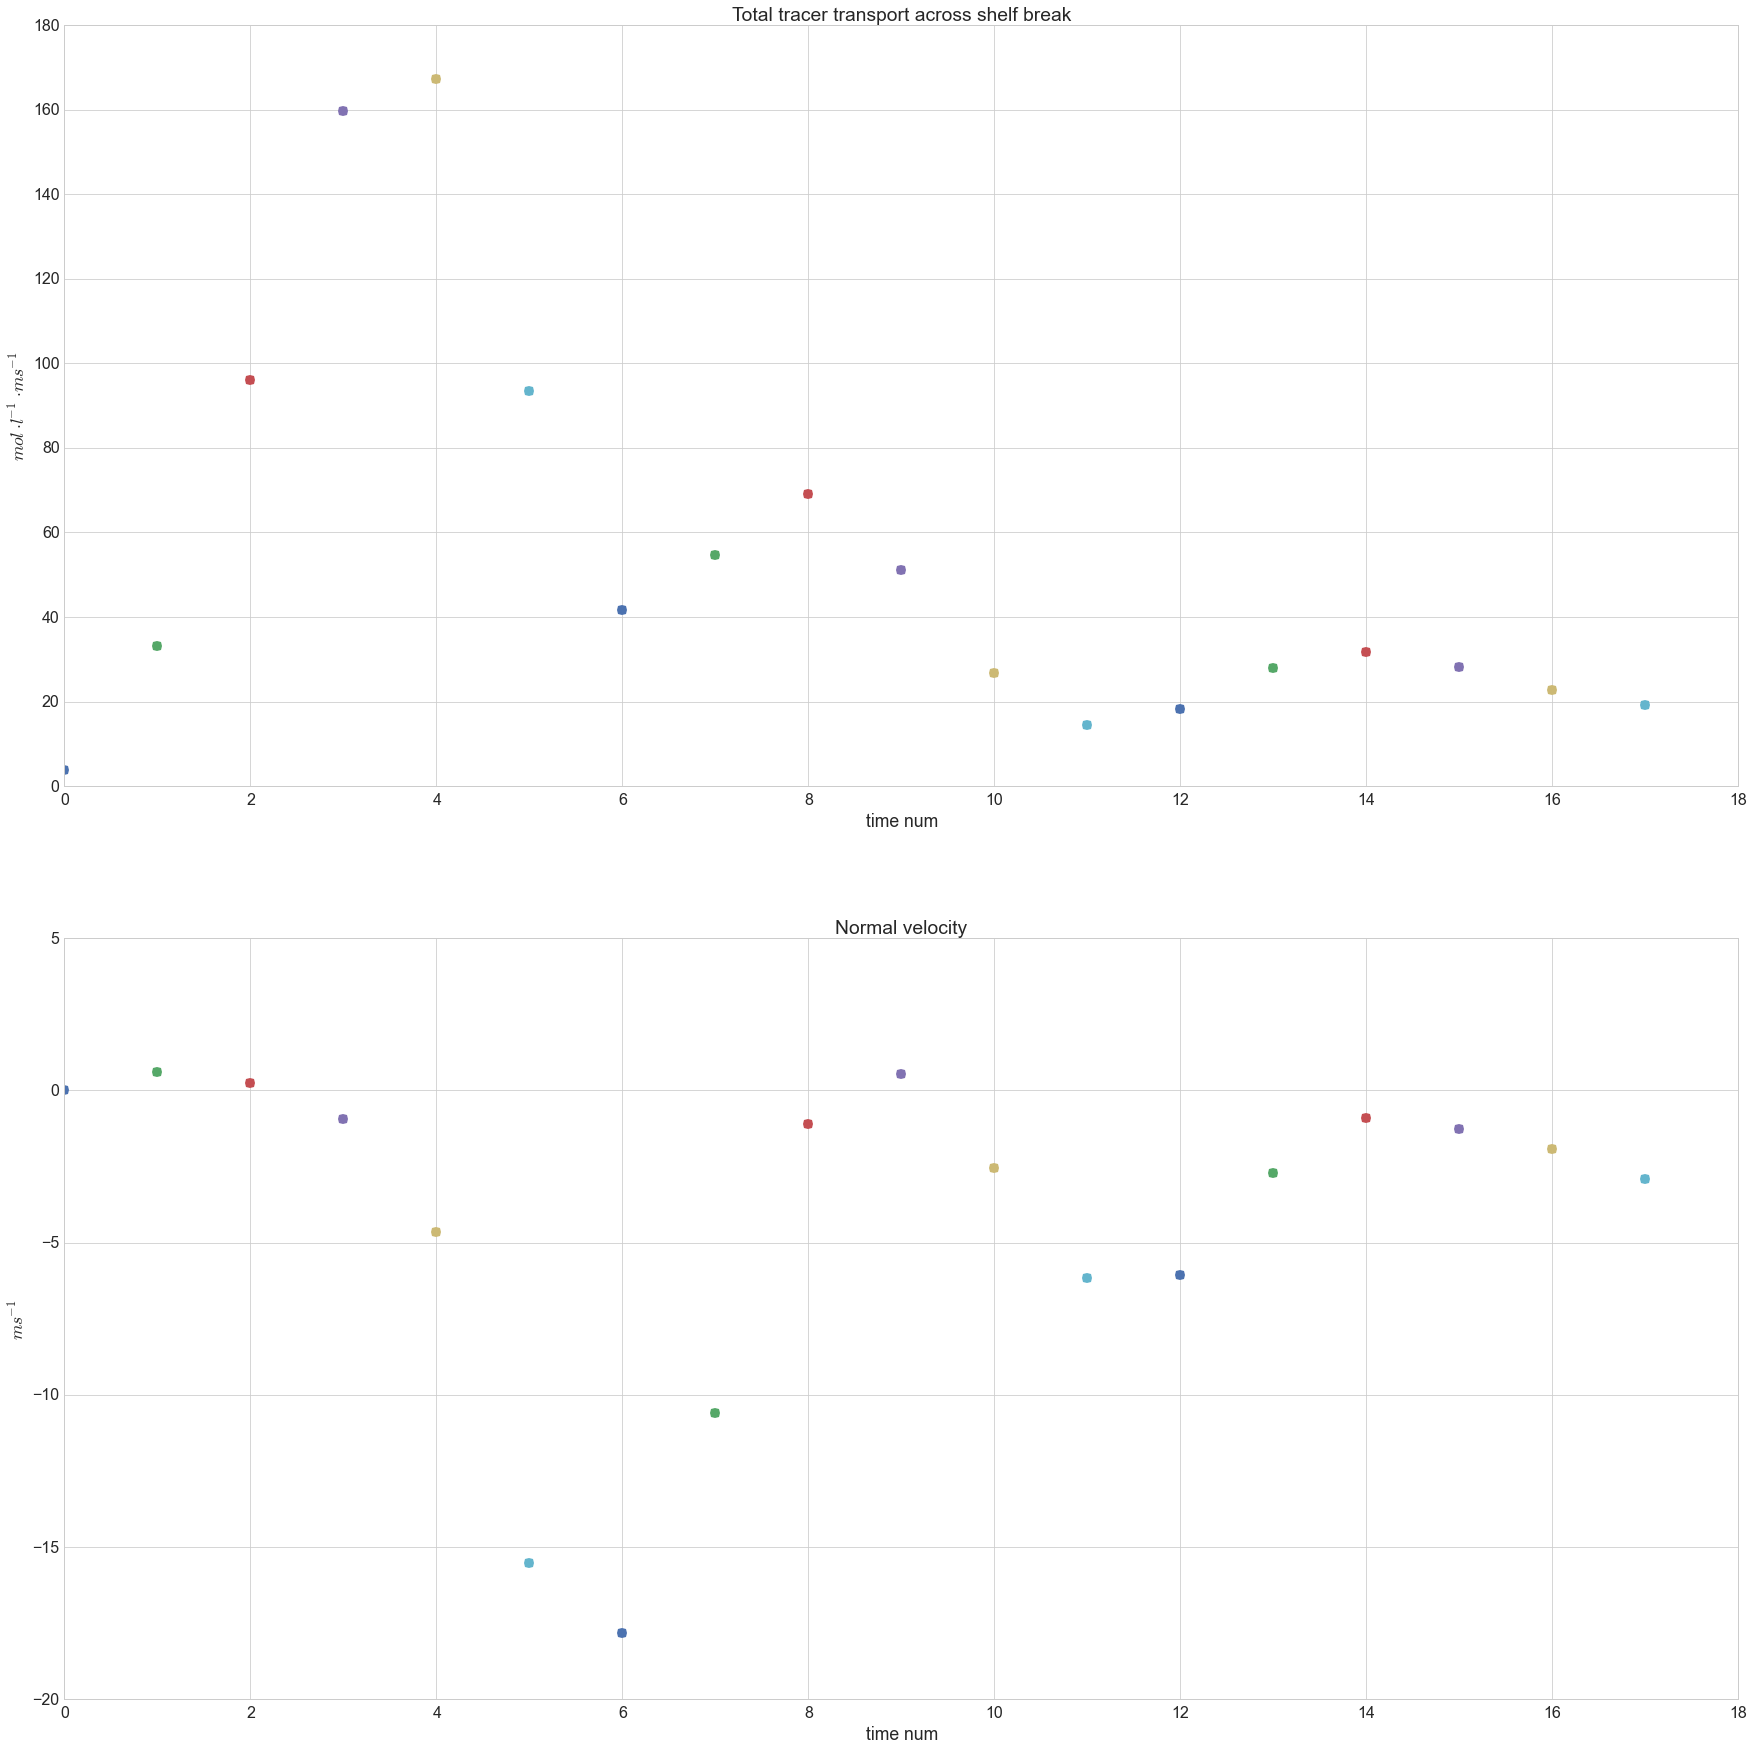

In [10]:
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
figSize=(30,30)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt,VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC01,z,xc,zlev,hFacC,MaskC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(tt,np.sum(TracTrans),'o',markersize = 10,label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('time num')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt,V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt,U,z,xc,zlev,hFacC,MaskC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(tt,np.sum(NormalVel),'o',markersize = 10,label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('time num')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')

<matplotlib.colorbar.Colorbar instance at 0x7fa45550b878>

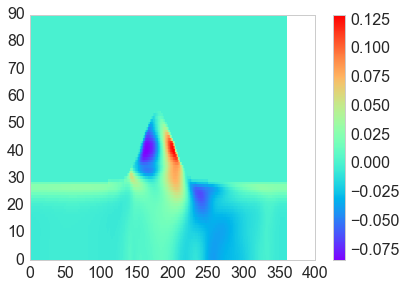

In [11]:
plt.pcolor(V[6,:,200,:],cmap='rainbow')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fa456337878>

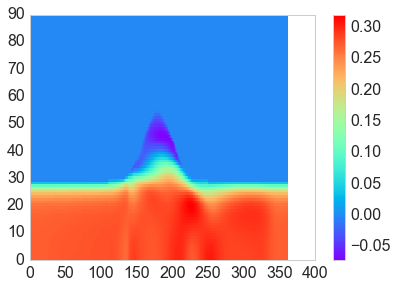

In [12]:
plt.pcolor(U[6,:,200,:],cmap='rainbow')
plt.colorbar()

###No-canyon case

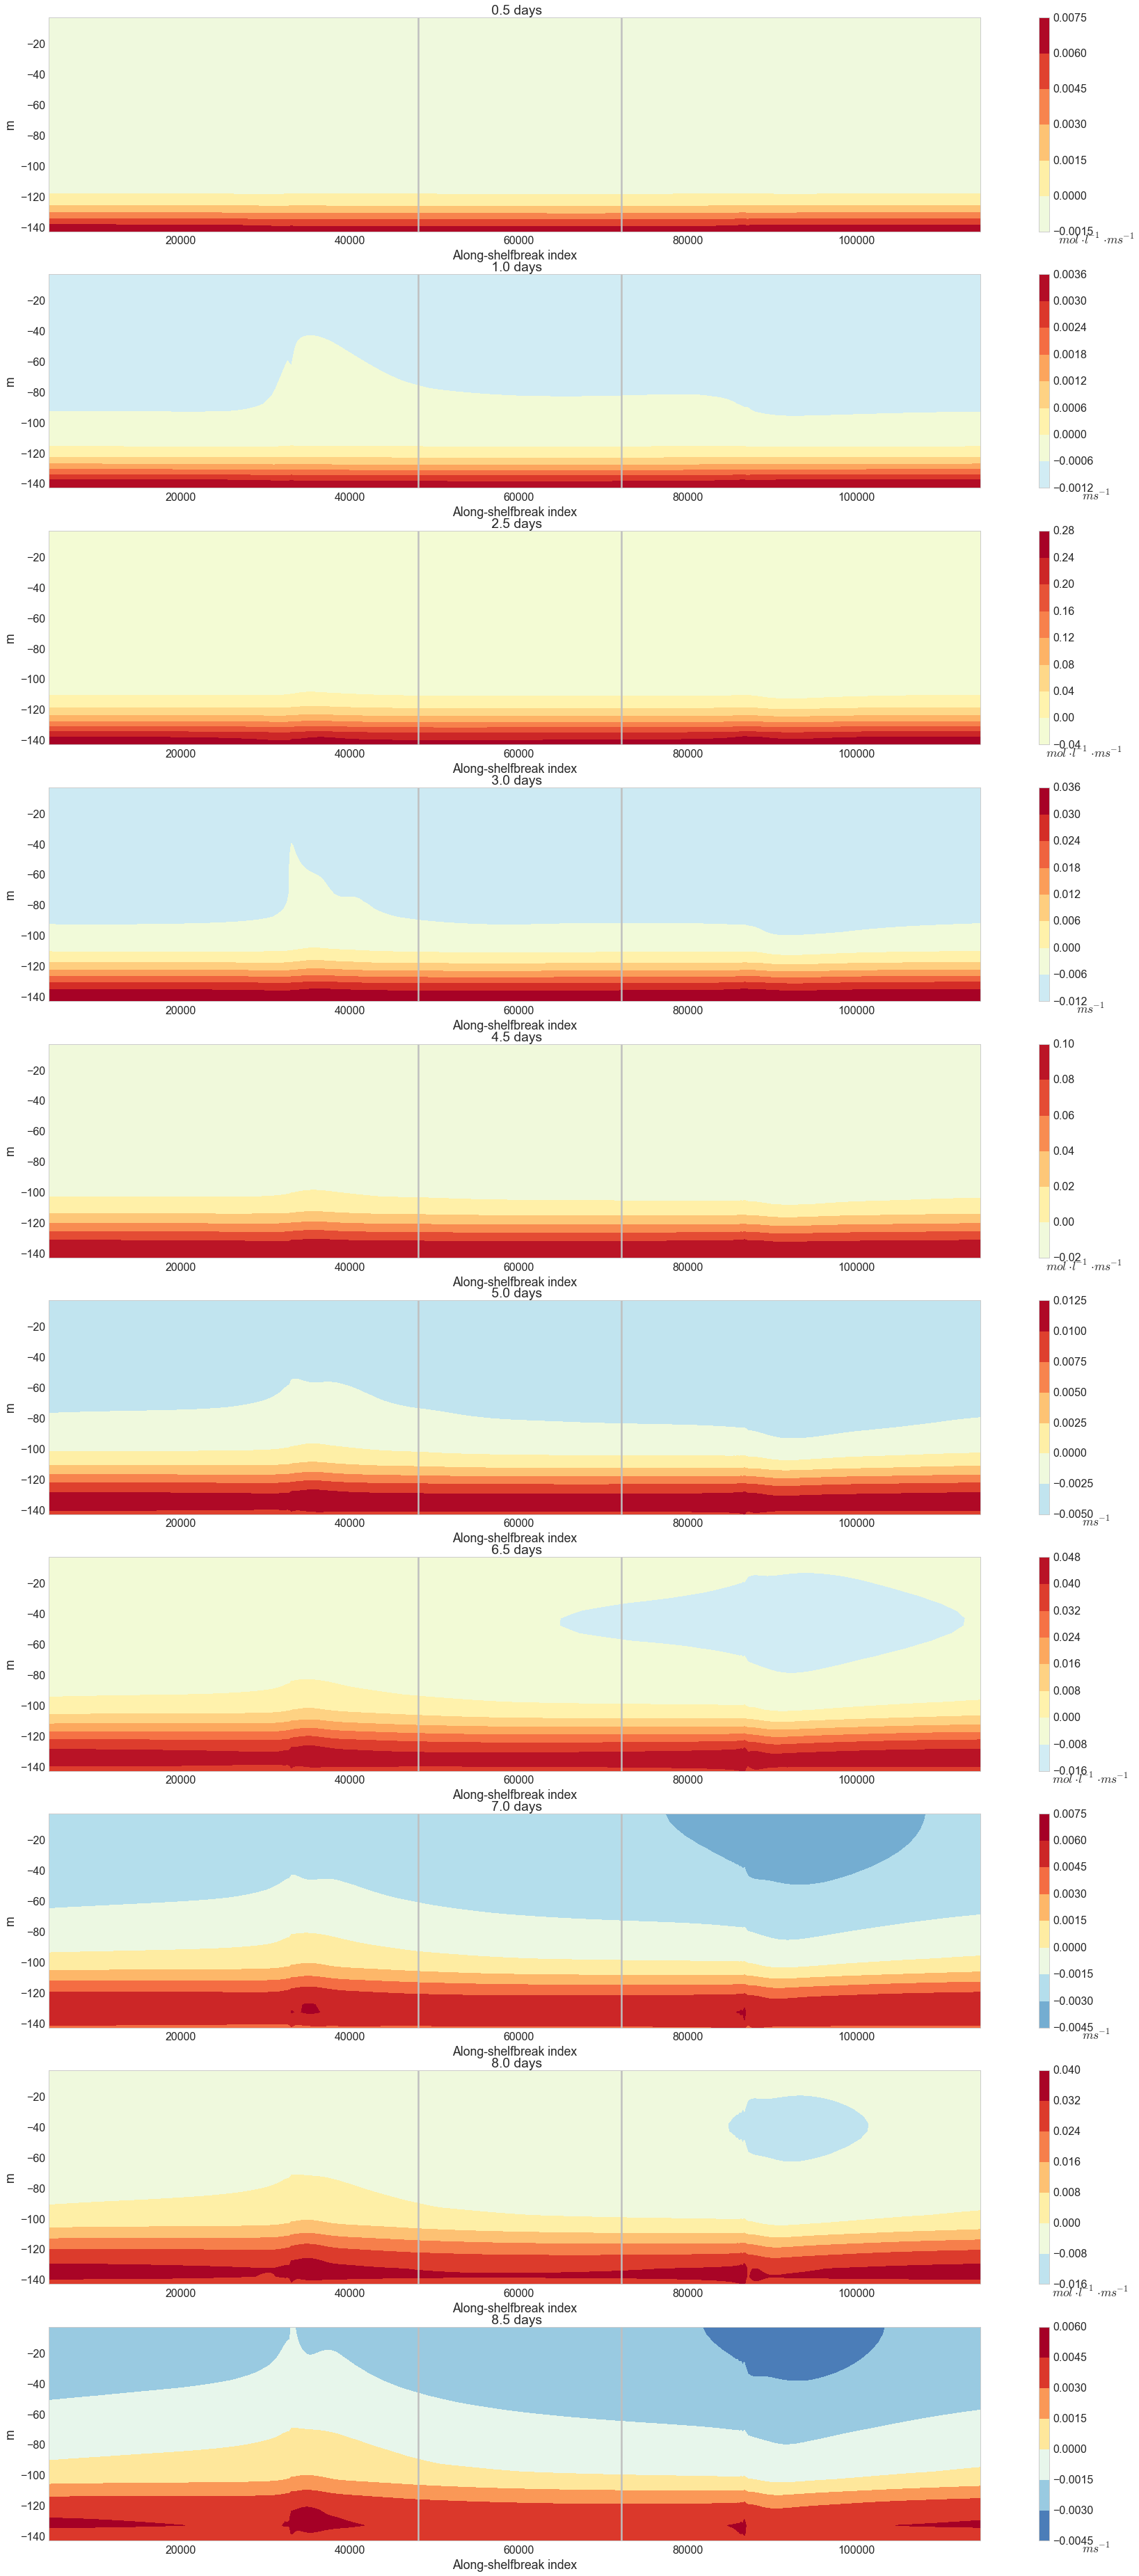

In [13]:
zlev = 29
SBxNoC, SByNoC = sb.findShelfBreak(zlev,hFacCNoC)
SBxxNoC = SBxNoC[:-1]
SByyNoC = SByNoC[:-1]
slopeNoC, thetaNoC = sb.findSlope(xc,yc,SBxxNoC,SByyNoC)
#slopeFiltNoC = sg.savitzky_golay(slopeNoC, 11, 3) # window size 11, polynomial order 3
slopeFiltNoC = slopeNoC
thetaFiltNoC = np.arctan(slopeFiltNoC)


times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,65)
numCols = 1
numRows = 10
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    
    VTRACPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt[0],VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt[0],UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    VPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt[1],VNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt[1],UNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFiltNoC) + UPlot[:,4:-4]*np.sin(-thetaFiltNoC) 

    sb.contourfFluxSB(tt[0],numCols,numRows,TracTrans,z,xc,unitsTr, 0,29,kk,zlev)
    sb.contourfFluxSB(tt[1],numCols,numRows,NormalVel,z,xc,unitsVel, 0,29,kk+1,zlev)
    
    kk = kk+2


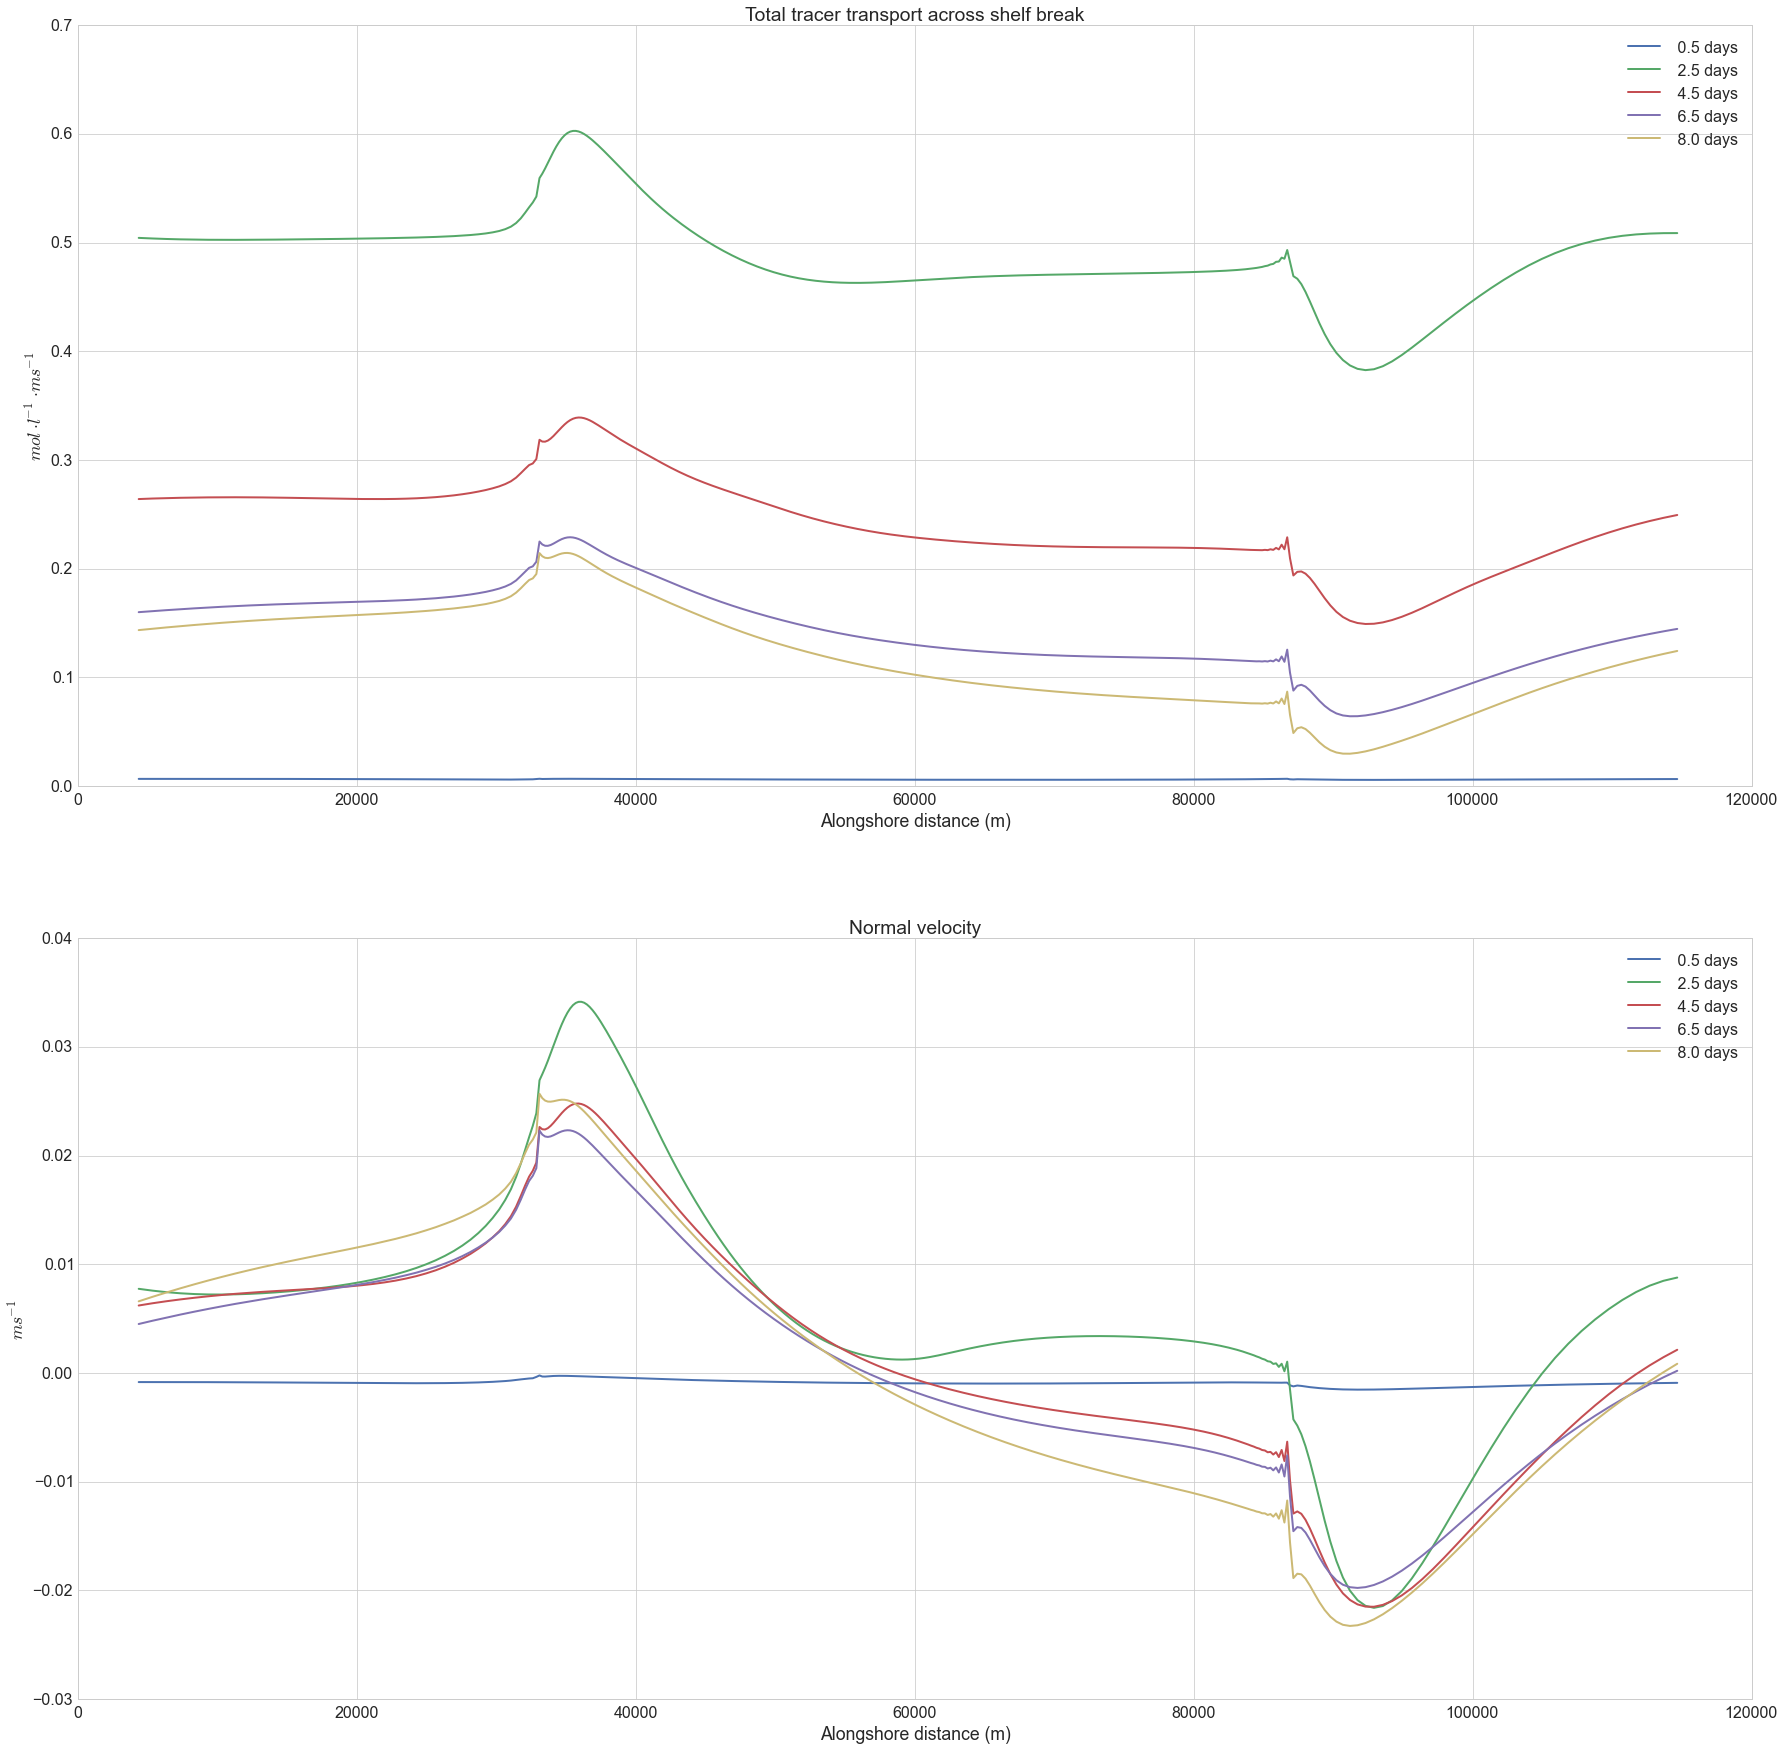

In [14]:
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(30,30)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    VTRACPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt[0],VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt[0],UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(TracTrans,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt[1],VNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt[1],UNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFiltNoC) + UPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(NormalVel,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')
    

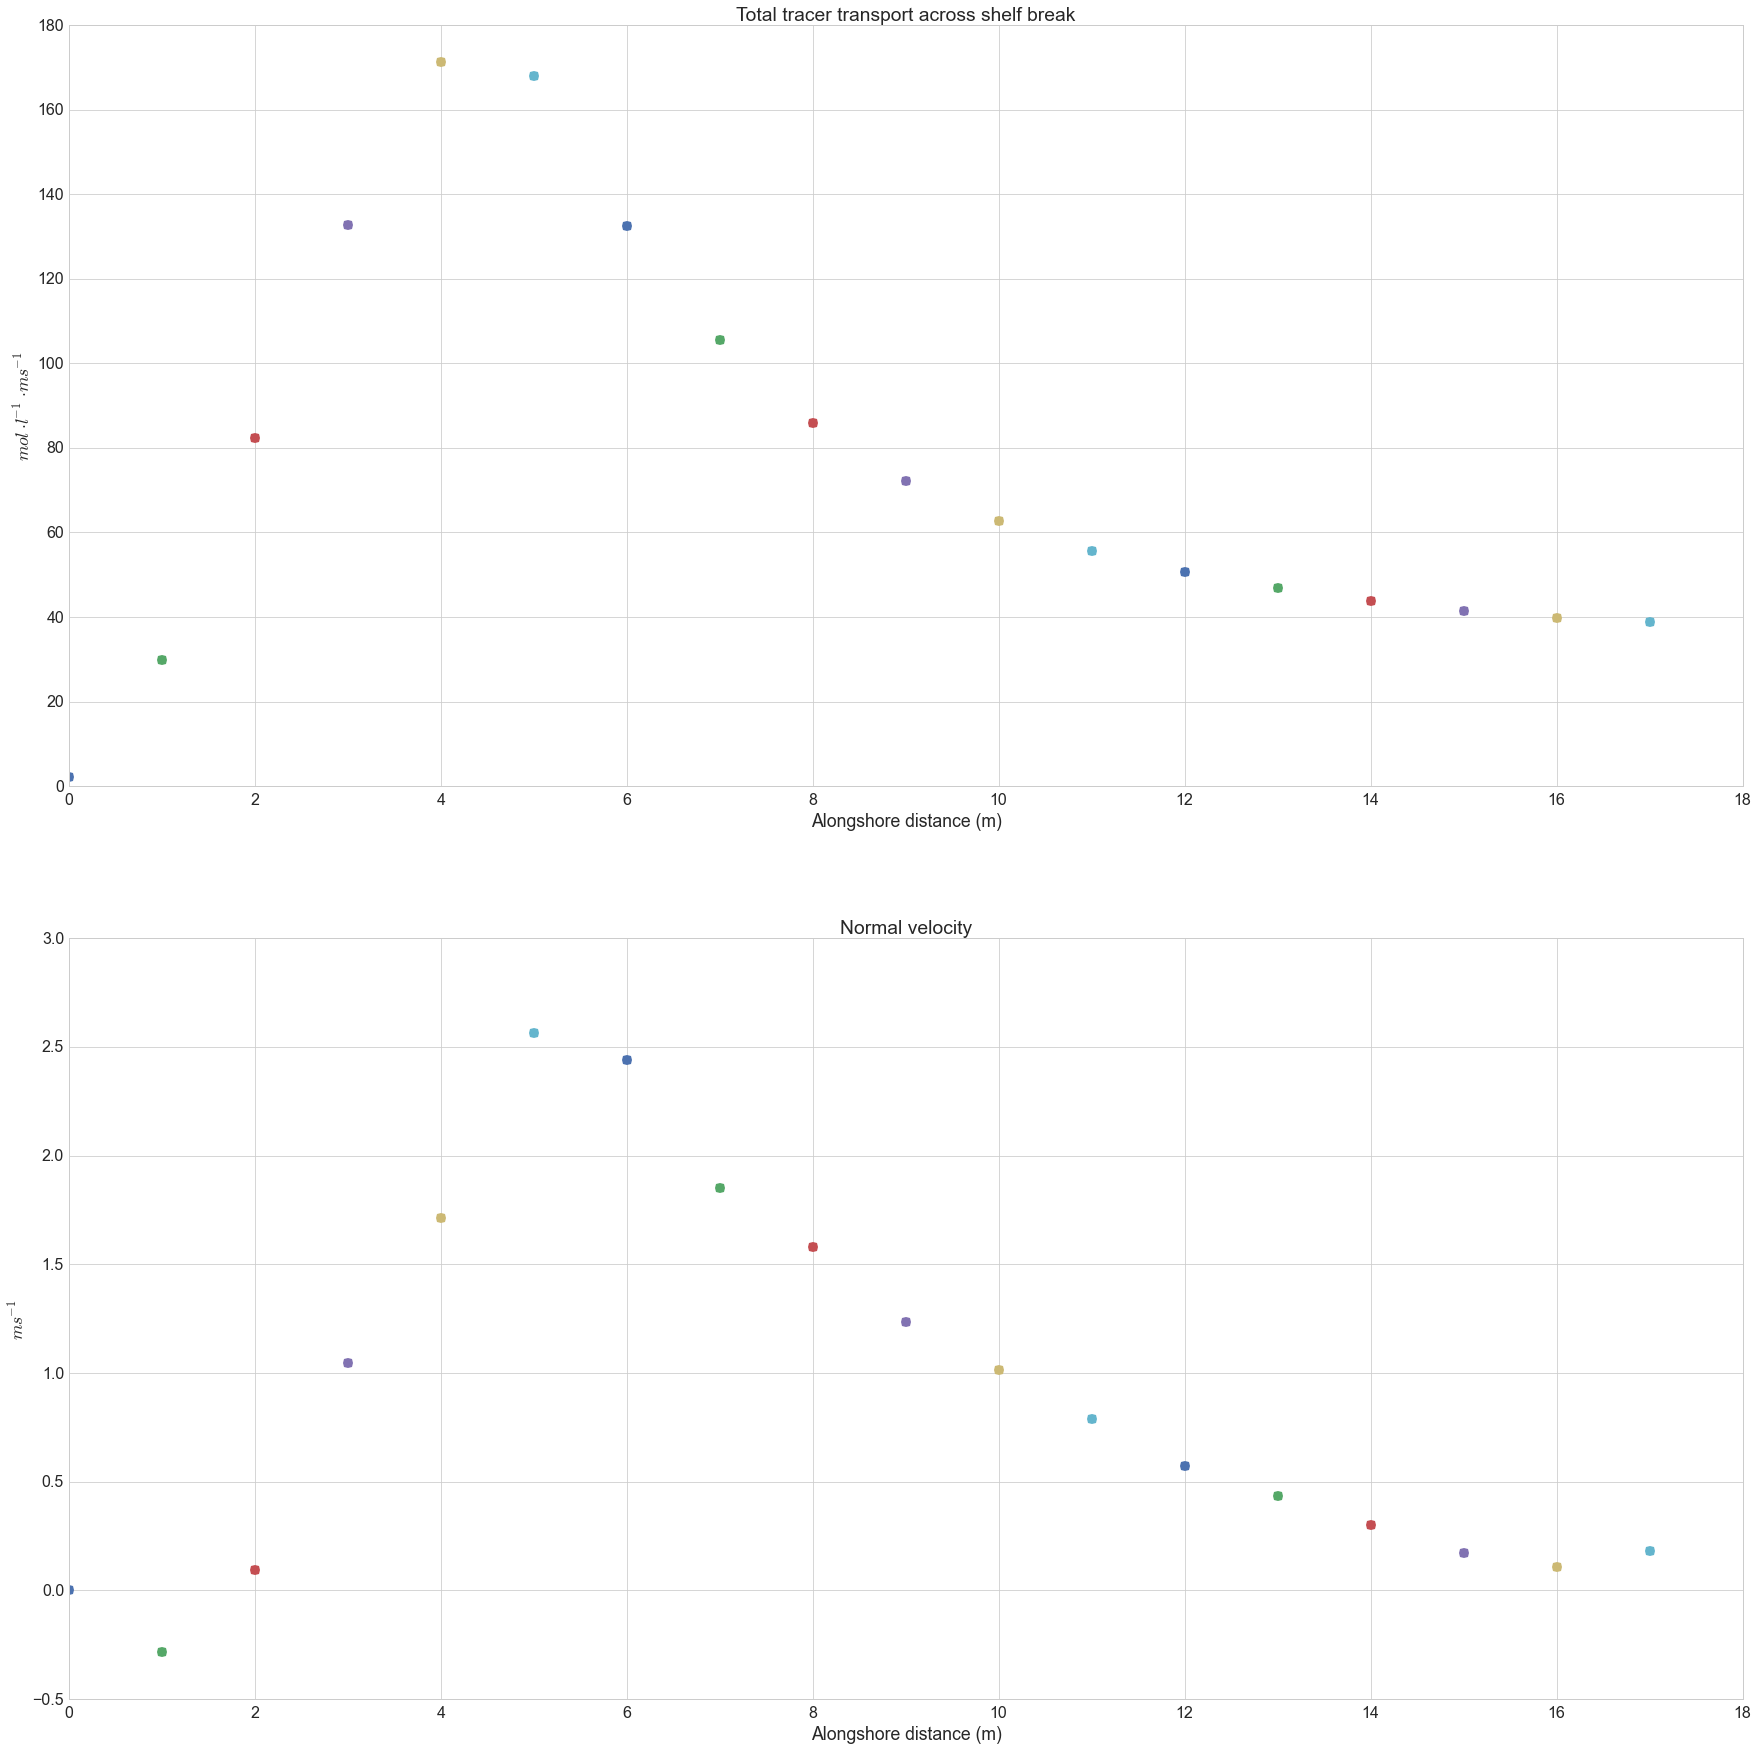

In [15]:
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
figSize=(30,30)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VTRACPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(tt,np.sum(TracTrans),'o',markersize = 10,label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(tt,np.sum(NormalVel),'o',markersize = 10,
            
            
            label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')

### Grid experiments

In [16]:
CanyonGrid1='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run04/gridGlob.nc'
CanyonGridOut1 = Dataset(CanyonGrid1)

CanyonState1='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run04/stateGlob.nc'
CanyonStateOut1 = Dataset(CanyonState1)

FluxTR01_1 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run04/FluxTR01Glob.nc'


In [17]:
z = CanyonStateOut1.variables['Z']
#print(z[10])

xc = rout.getField(CanyonGrid1, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid1, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid1, 'Depth')

hFacC = rout.getField(CanyonGrid1, 'HFacC')
MaskC = rout.getMask(CanyonGrid1, 'HFacC')




In [18]:
V = rout.getField(CanyonState1,'V') # 
VTRAC01 = rout.getField(FluxTR01_1,'VTRAC01') # 

U = rout.getField(CanyonState1,'U') # 
UTRAC01 = rout.getField(FluxTR01_1,'UTRAC01') # 


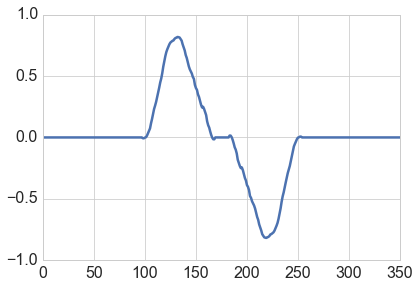

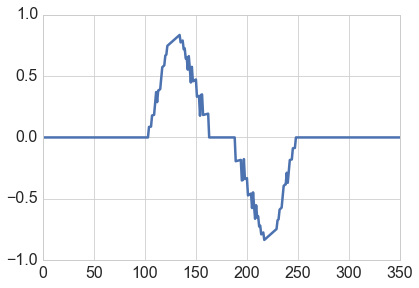

In [19]:
zlev = 29
SBx, SBy = sb.findShelfBreak(zlev,hFacC)
SBxx = SBx[:-1]
SByy = SBy[:-1]
slope, theta = sb.findSlope(xc,yc,SBxx,SByy)
slopeFilt = sg.savitzky_golay(slope, 13, 3) # window size 11, polynomial order 3
thetaFilt = np.arctan(slopeFilt)
plt.plot(thetaFilt)
plt.show()
plt.plot(theta)

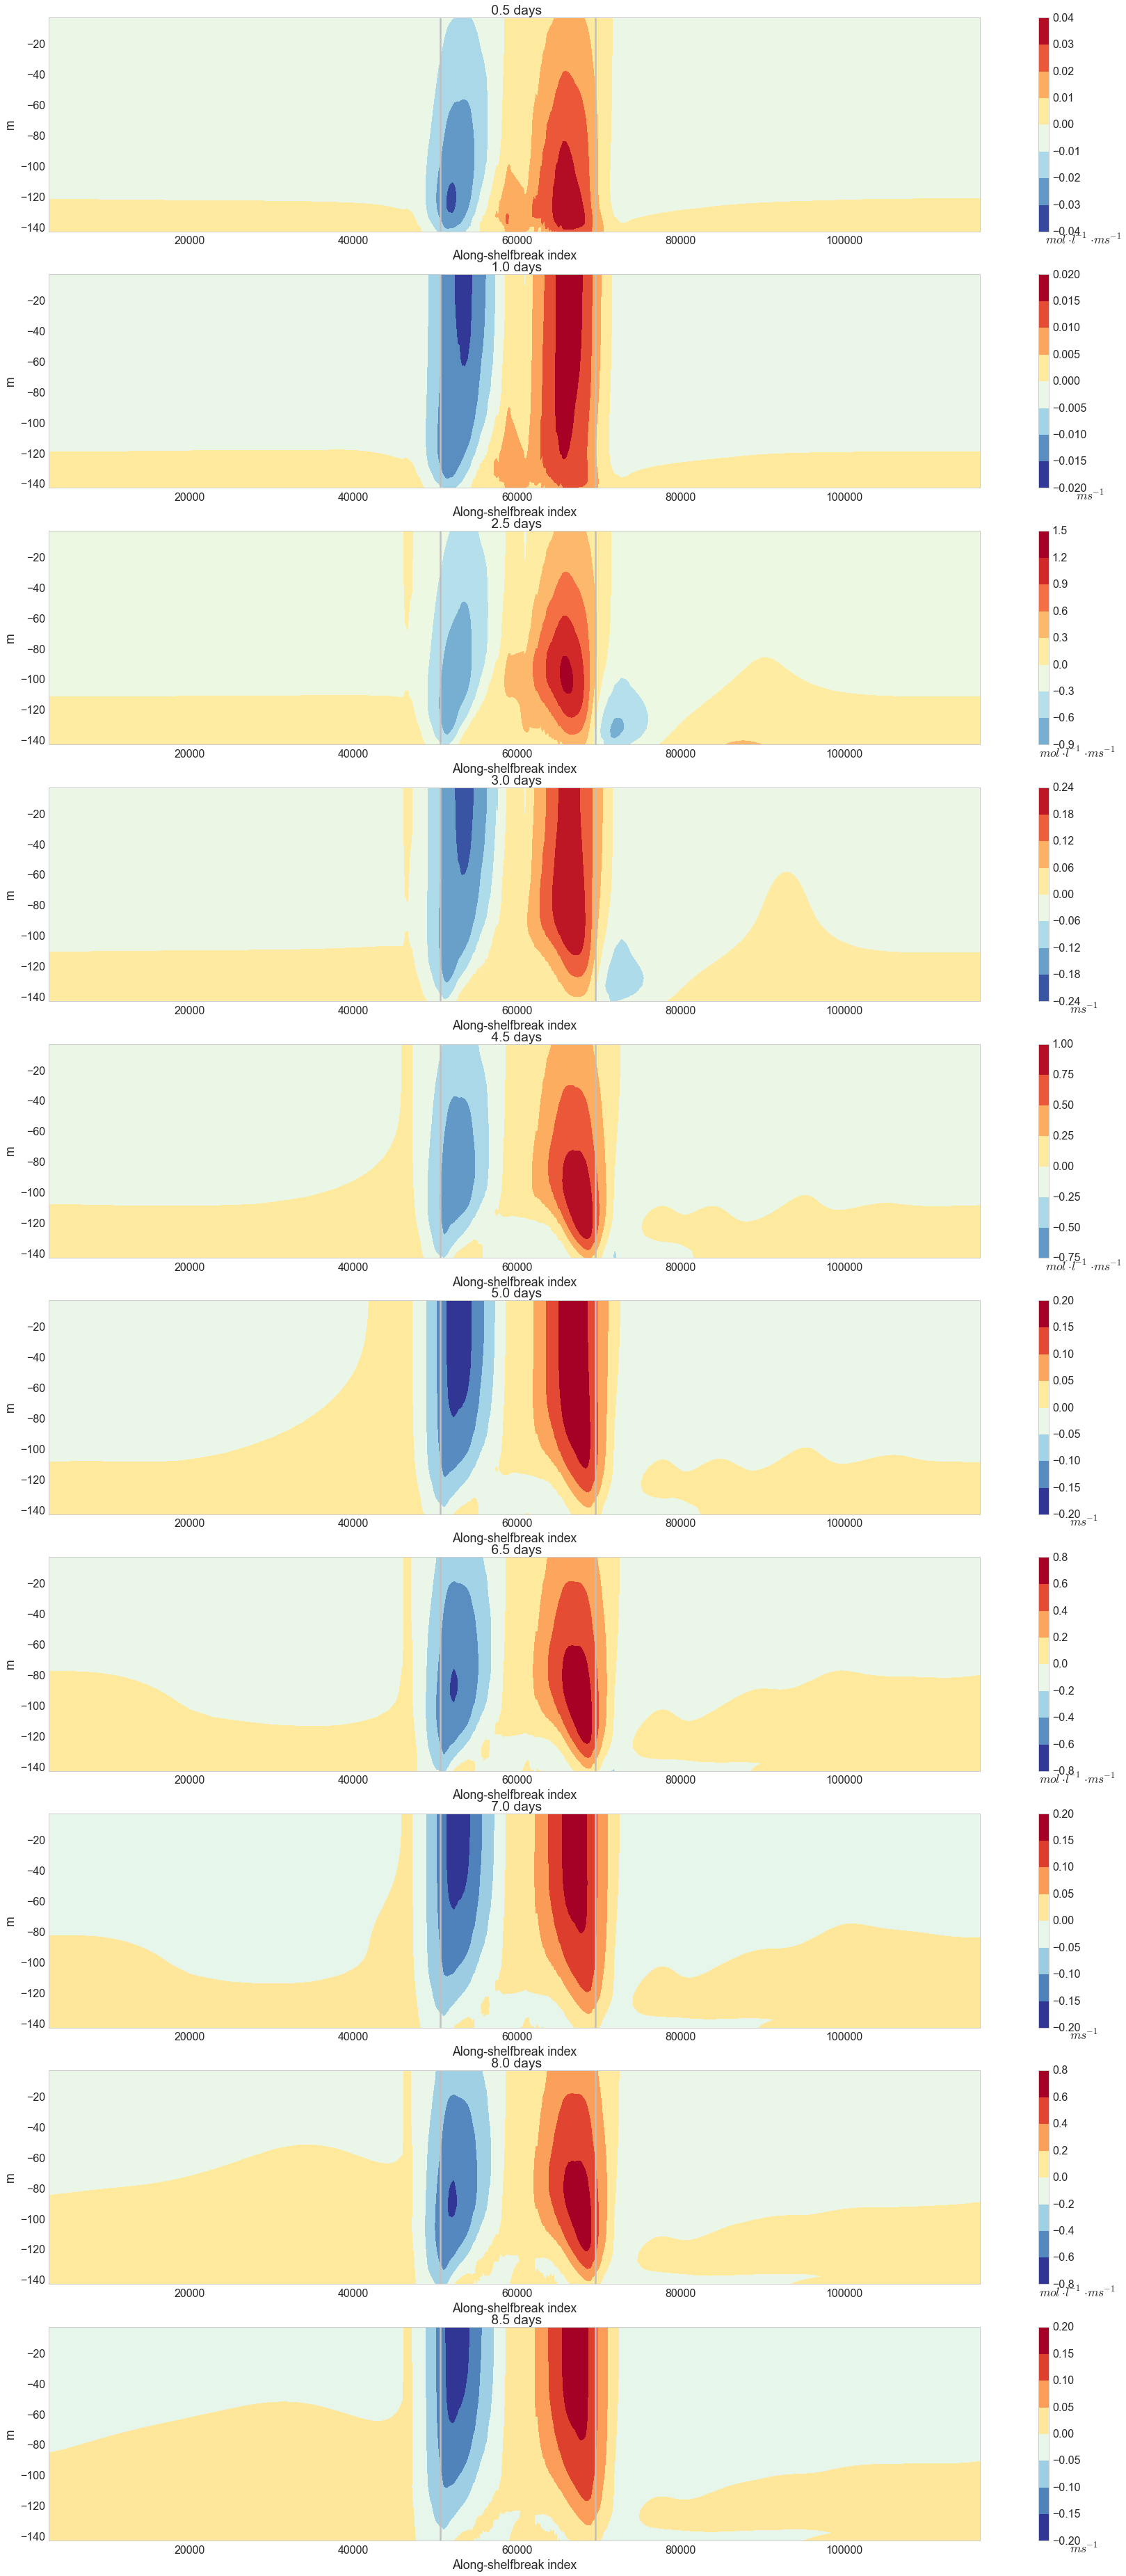

In [20]:
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(30,65)
numCols = 1
numRows = 10
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],UTRAC01,z,xc,zlev,hFacC,MaskC)
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 

    sb.contourfFluxSB(tt[0],numCols,numRows,TracTrans,z,xc,unitsTr, 0,29,kk,zlev)
    sb.contourfFluxSB(tt[1],numCols,numRows,NormalVel,z,xc,unitsVel, 0,29,kk+1,zlev)
    
    kk = kk+2

    

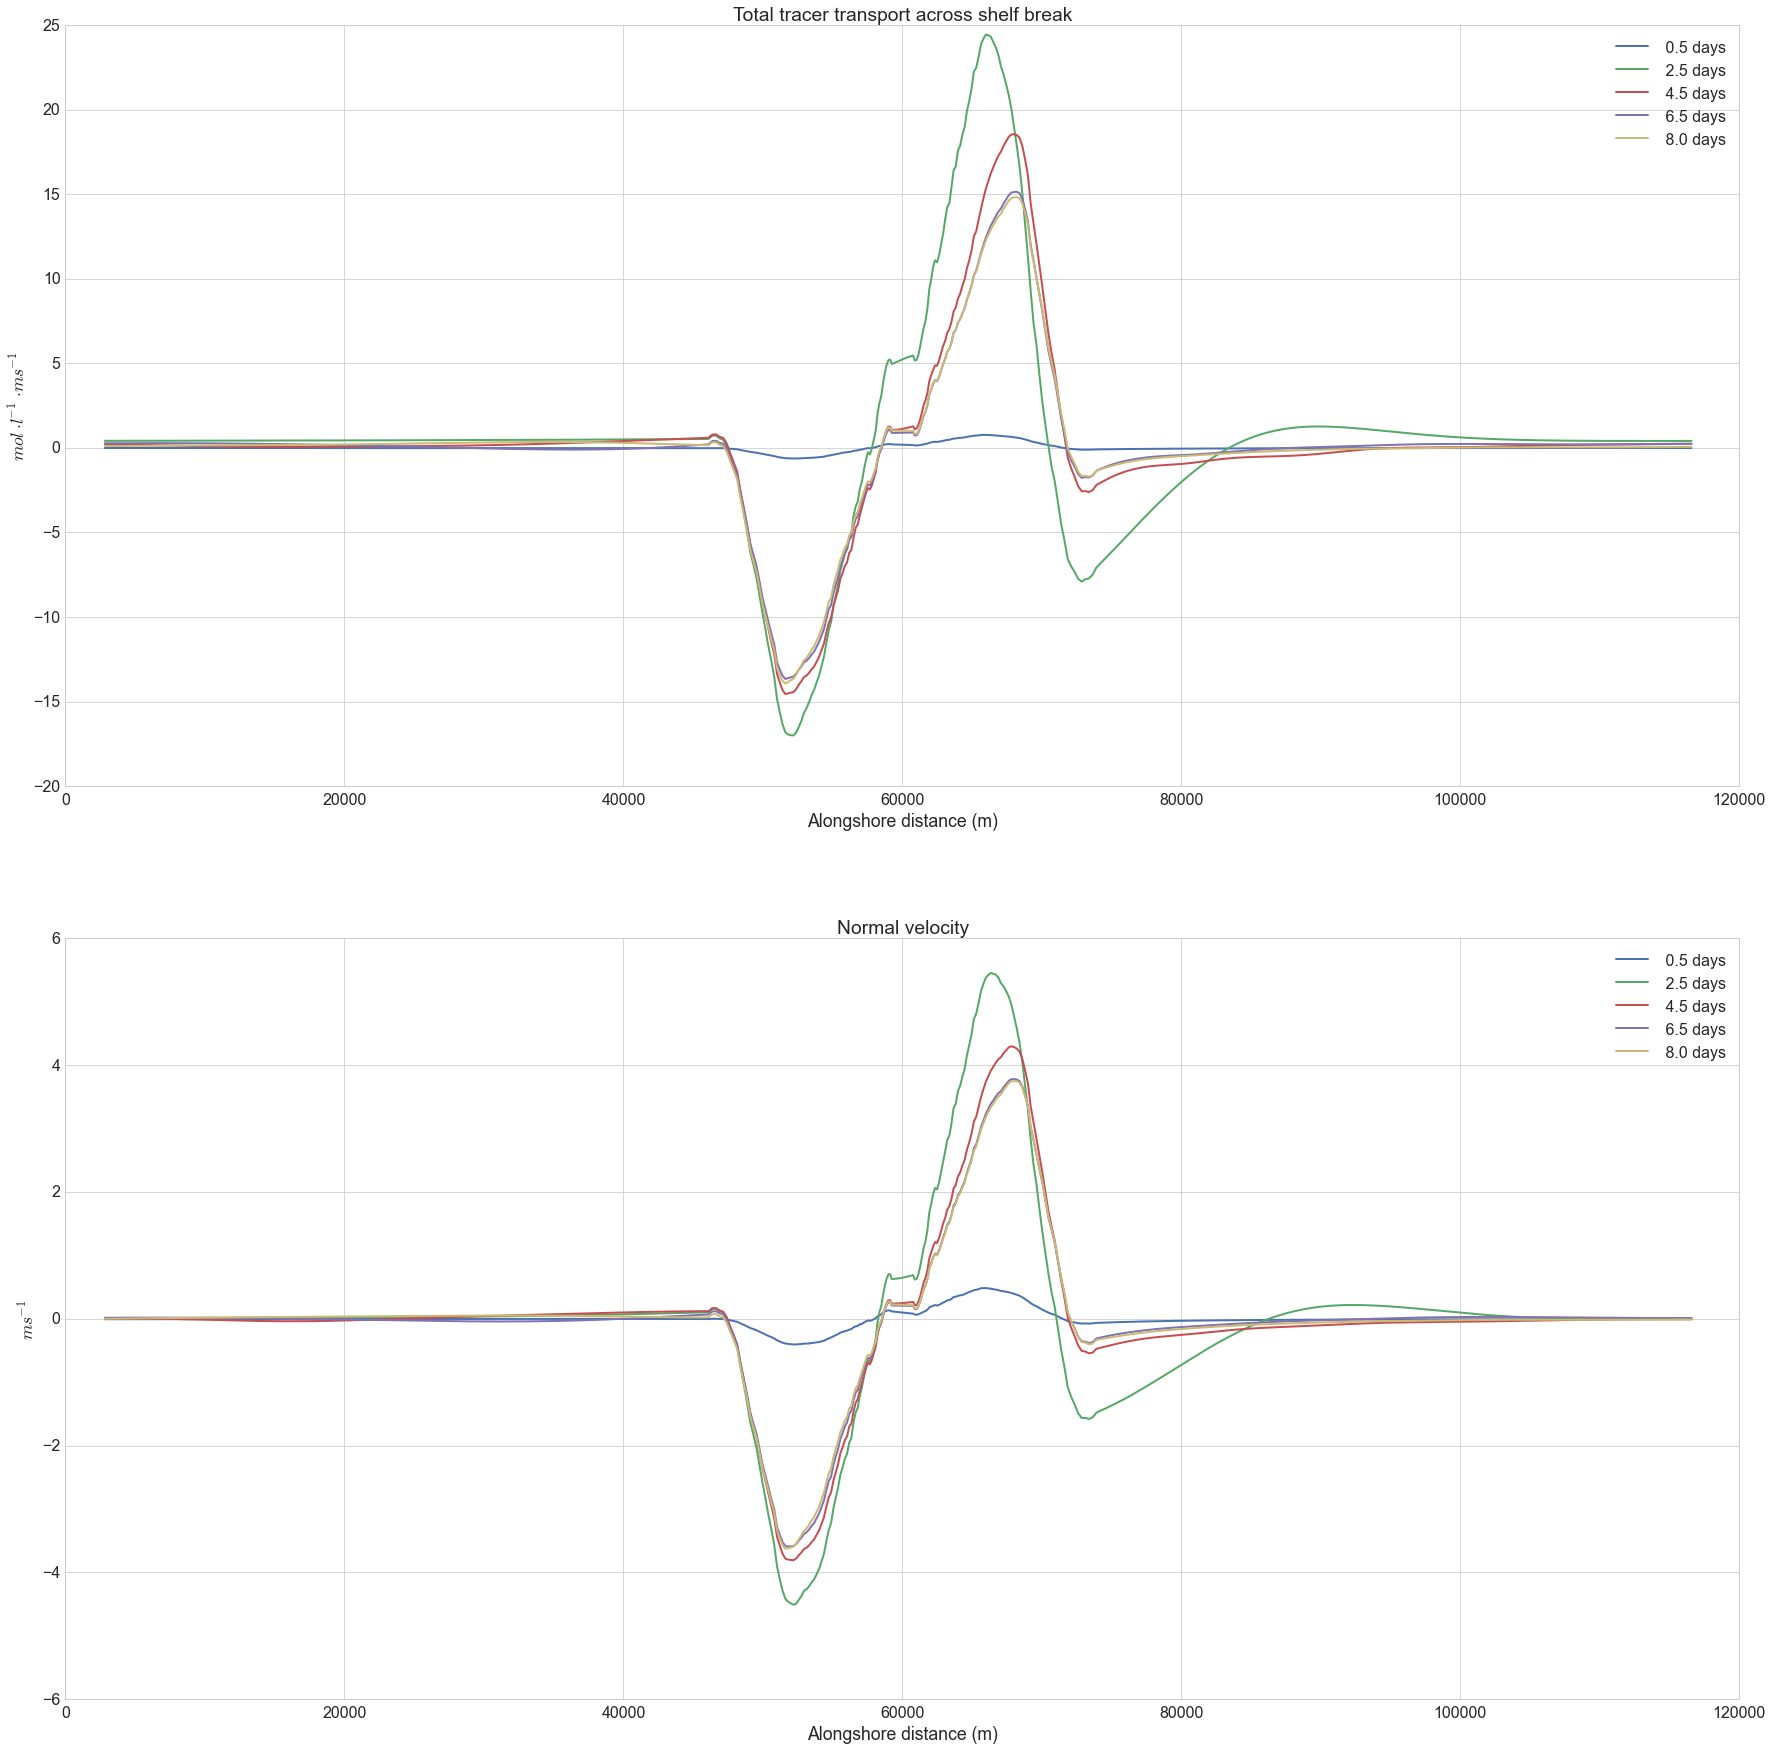

In [21]:
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(30,30)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],UTRAC01,z,xc,zlev,hFacC,MaskC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(TracTrans,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(NormalVel,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')
    
    

### No canyon - new grid

In [22]:
CanyonGrid2='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run05/gridGlob.nc'
CanyonGridOut2 = Dataset(CanyonGrid2)

CanyonState2='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run05/stateGlob.nc'
CanyonStateOut2 = Dataset(CanyonState2)

FluxTR01_2 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run05/FluxTR01Glob.nc'


In [23]:
z = CanyonStateOut1.variables['Z']
#print(z[10])

xc = rout.getField(CanyonGrid2, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid2, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid2, 'Depth')

hFacC = rout.getField(CanyonGrid2, 'HFacC')
MaskC = rout.getMask(CanyonGrid2, 'HFacC')




In [24]:
V = rout.getField(CanyonState2,'V') # 
VTRAC01 = rout.getField(FluxTR01_2,'VTRAC01') # 

U = rout.getField(CanyonState2,'U') # 
UTRAC01 = rout.getField(FluxTR01_2,'UTRAC01') # 


In [25]:
zlev = 29
SBx, SBy = sb.findShelfBreak(zlev,hFacC)
SBxx = SBx[:-1]
SByy = SBy[:-1]
slope, theta = sb.findSlope(xc,yc,SBxx,SByy)
slopeFilt = sg.savitzky_golay(slope, 11, 3) # window size 11, polynomial order 3
thetaFilt = np.arctan(slopeFilt)


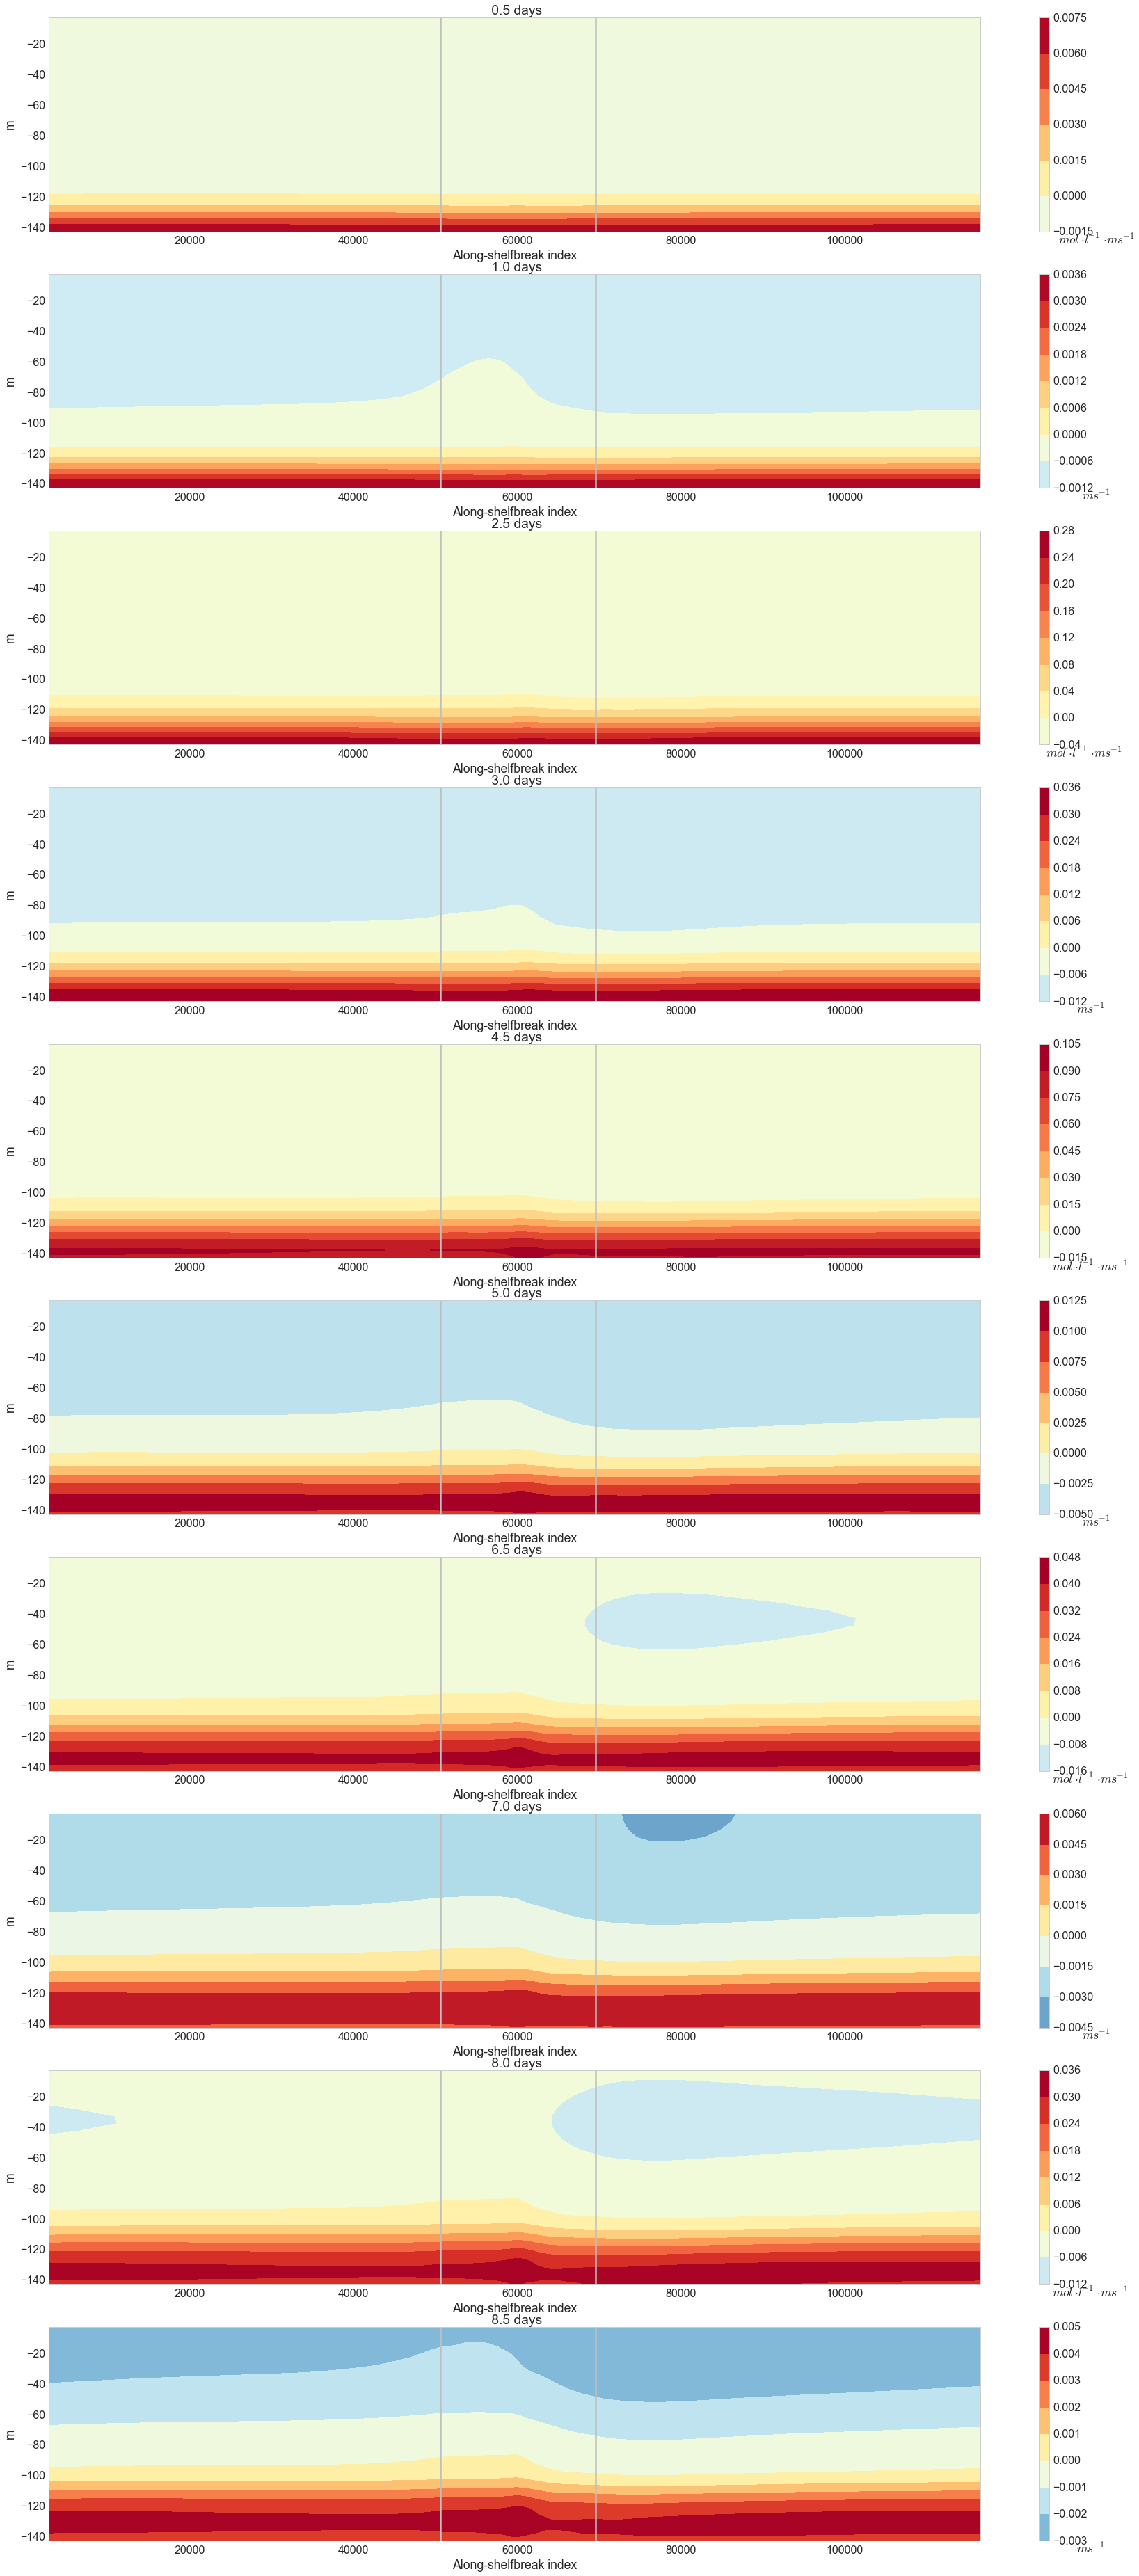

In [26]:
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(30,65)
numCols = 1
numRows = 10
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],UTRAC01,z,xc,zlev,hFacC,MaskC)
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 

    sb.contourfFluxSB(tt[0],numCols,numRows,TracTrans,z,xc,unitsTr, 0,29,kk,zlev)
    sb.contourfFluxSB(tt[1],numCols,numRows,NormalVel,z,xc,unitsVel, 0,29,kk+1,zlev)
    
    kk = kk+2

  

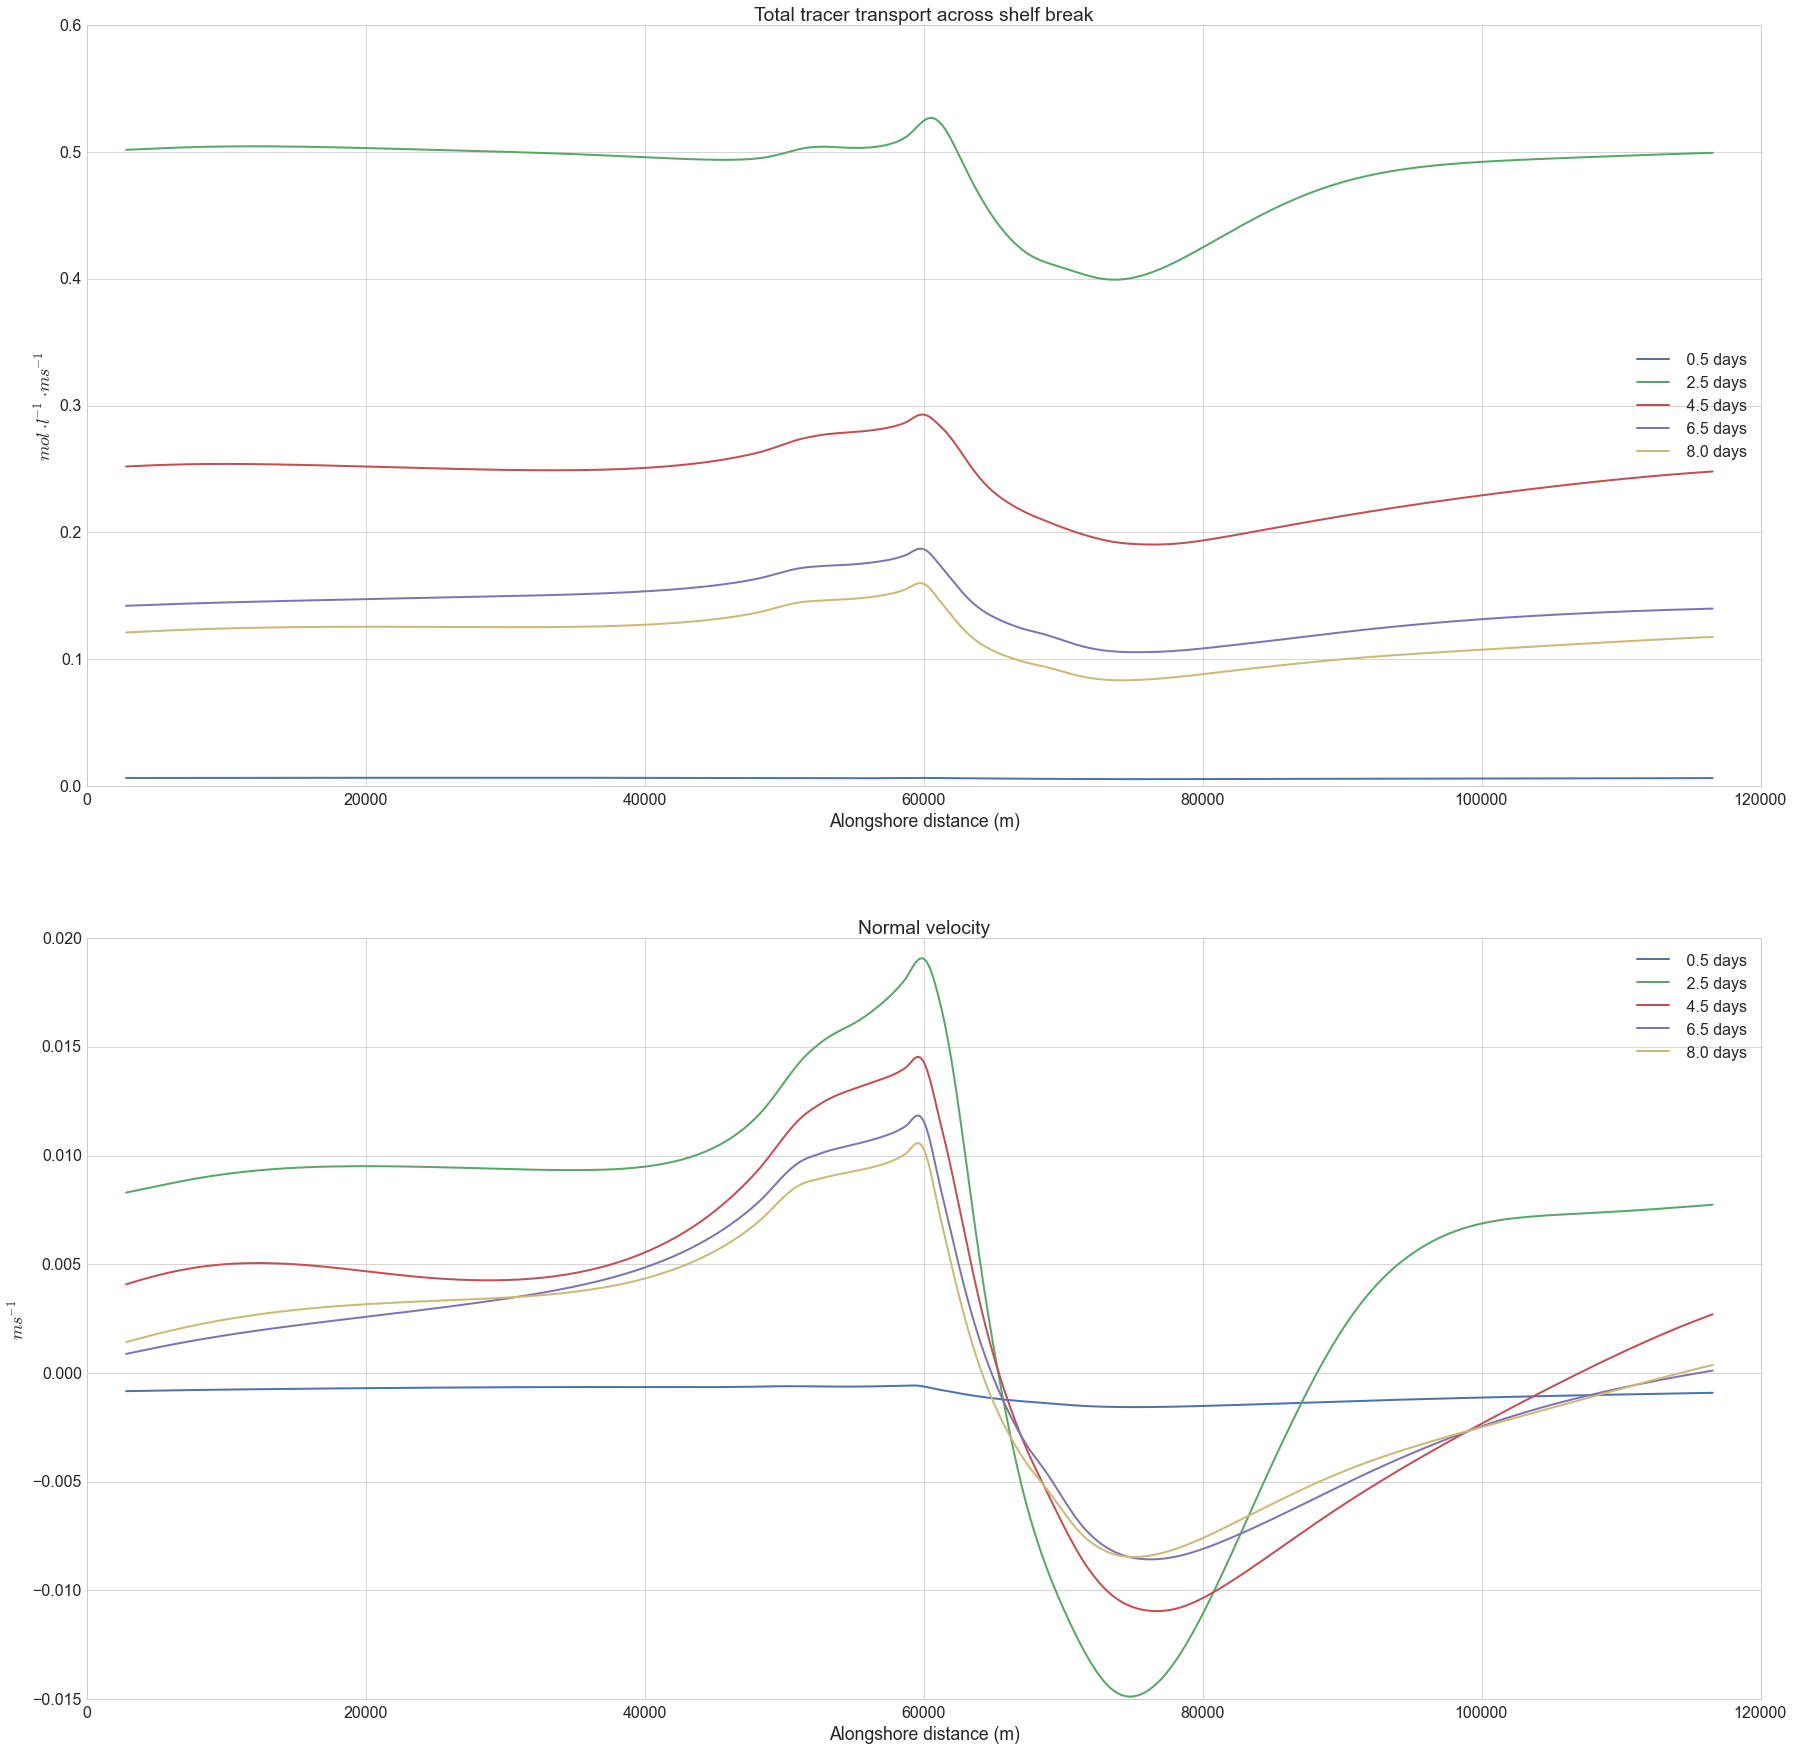

In [27]:
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(30,30)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],UTRAC01,z,xc,zlev,hFacC,MaskC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(TracTrans,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(NormalVel,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')
    
    

<matplotlib.colorbar.Colorbar instance at 0x7fa455499908>

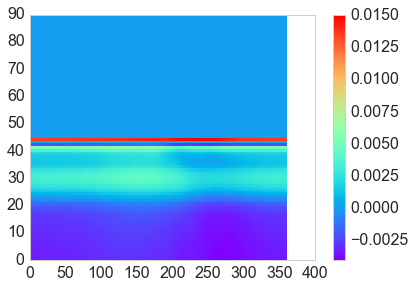

In [30]:
plt.pcolor(V[6,:,200,:],cmap='rainbow')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fa453d255a8>

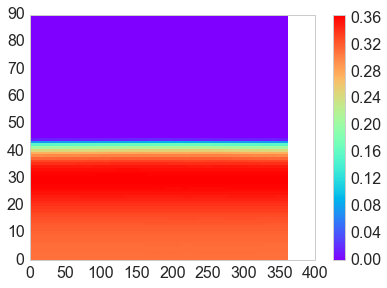

In [31]:
plt.pcolor(U[6,:,200,:],cmap='rainbow')
plt.colorbar()